# Exercices 1

[Télécharger l'exercice](../01_exercice.zip)

# Exercice du compte en banque 

Le but de cet exercice est de construire un premier modèle numerique pour modeliser l'évolution d'un compte en banque. Il permet aussi de comparer l'utilité respective d'une solution analytique par rapport à un modéle numérique.

Une somme d'argent initiale est déposée en banque (`M_init = 20000`) et une épargne supplémentaire annuelle s'y ajoute (`M_save = 500`).

## 1.1
Quel sera le montant de l'épargne aprés 5, 10 et 35 ans (solution analytique)? Codez les formules qui vous permettent de répondre à cette question.

### ✅ **À vous de faire !**

In [8]:
M_init = 20000
M_save = 500

FV5 = M_init  + (M_save)*5
FV10 = M_init + (M_save)*10
FV35 = M_init + (M_save)*35

print("Montant aprés 5 ans: ", FV5)
print("Montant aprés 10 ans: ", FV10)
print("Montant aprés 35 ans: ", FV35)

Montant aprés 5 ans:  22500
Montant aprés 10 ans:  25000
Montant aprés 35 ans:  37500


## 1.2

Répétez l'exercice à l'aide d'une boucle. N'oubliez pas de définir toute variable modifiée dans la boucle avant qu'elle ne commence. Ici, vous pouvez initialiser le vecteur `M_evol` avec la fonction de `numpy` qui définit un vecteur de zeros afin de stocker le montant de l'épargne chaque année (cela sera utile par la suite).

```python
M_evol = np.zeros(35) # initialisation avec un vecteur de zeros.
for i in range(1,35): 
    [...]
```

### ✅ **À vous de faire !**

In [9]:
import numpy as np # importer le module numpy

# paramètres
M_init = 20000 
M_save = 500
temps_total = 35

M_evol1 = np.zeros(temps_total+1) # initialisation avec un vecteur de zeros.
M_evol1[0] = M_init # somme initiale

for it in range(1, temps_total+1): 
    M_evol1[it] = M_evol1[it - 1] + M_save # ajout de l'épargne annuelle
    print("Année ", it, ": ", M_evol1[it]) # affichage du montant chaque année
    

Année  1 :  20500.0
Année  2 :  21000.0
Année  3 :  21500.0
Année  4 :  22000.0
Année  5 :  22500.0
Année  6 :  23000.0
Année  7 :  23500.0
Année  8 :  24000.0
Année  9 :  24500.0
Année  10 :  25000.0
Année  11 :  25500.0
Année  12 :  26000.0
Année  13 :  26500.0
Année  14 :  27000.0
Année  15 :  27500.0
Année  16 :  28000.0
Année  17 :  28500.0
Année  18 :  29000.0
Année  19 :  29500.0
Année  20 :  30000.0
Année  21 :  30500.0
Année  22 :  31000.0
Année  23 :  31500.0
Année  24 :  32000.0
Année  25 :  32500.0
Année  26 :  33000.0
Année  27 :  33500.0
Année  28 :  34000.0
Année  29 :  34500.0
Année  30 :  35000.0
Année  31 :  35500.0
Année  32 :  36000.0
Année  33 :  36500.0
Année  34 :  37000.0
Année  35 :  37500.0


Dans ce cas de figure, y a-t-il un avantage ou un désavantage à employer une boucle numérique à la place d'une solution analytique?

### ✅ **À vous de faire !** (répondre à la question dans un bloc 'markdown')

_Non, il n'y a pas d'avantage, c'est même plus long_


## 1.3
Tracez l'évolution de la fortune en fonction du temps avec la fonction `plt.plot`.

### ✅ **À vous de faire !** 

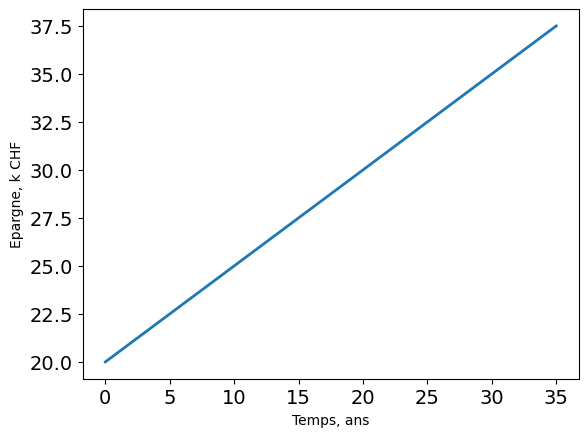

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.clf()
plt.plot(M_evol1/1000, linewidth=2) 
plt.xlabel('Temps, ans')
plt.ylabel('Epargne, k CHF')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 1.4
Reprenez l'évolution de la fortune et le code des points 1.2 et 1.3. En définissant un nouveau vecteur, ajoutez un taux d'intérêt de 0,6 % (rappel : les intérêts de l'année $n$ sont ajoutés à la fortune au premier janvier de l'année $n+1$). 

Tracez l'évolution de la fortune en fonction du temps avec la fonction dans les deux cas : avec et sans intérêts.

### ✅ **À vous de faire !** 

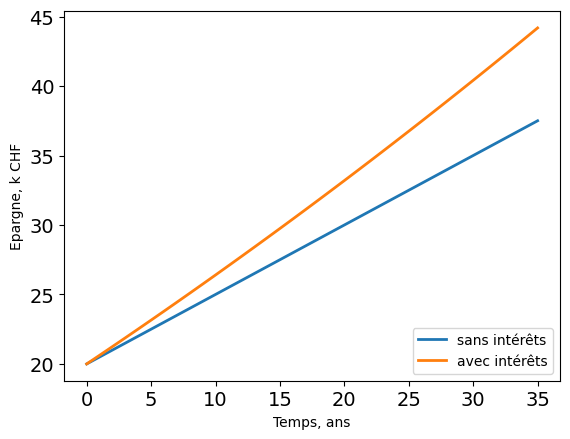

In [14]:
# paramètres
M_init = 20000
M_save = 500
intrst = 0.006
temps_total = 35

M_evol1 = np.zeros(temps_total+1) # initialisation avec un vecteur de zeros.
M_evol2 = np.zeros(temps_total+1)

M_evol1[0] = M_init # somme initiale
M_evol2[0] = M_init

for it in range(1, temps_total+1): 
    M_evol1[it] = M_evol1[it - 1] + M_save # ajout de l'épargne annuelle
    M_evol2[it] = (M_evol2[it - 1] + M_save) * (1 + intrst) 

plt.figure(1)
plt.clf()
plt.plot(M_evol1 / 1000, linewidth=2)
plt.plot(M_evol2 / 1000, linewidth=2)
plt.legend(['sans intérêts', 'avec intérêts'], loc='lower right')
plt.xlabel('Temps, ans')
plt.ylabel('Epargne, k CHF')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

A nouveau, une approche numérique est-elle nécessaire ici?

### ✅ **À vous de faire !** (Répondre à la question dans un bloc 'markdown')

_non, cela n'est pas necessaire_

## 1.5
Reprenez le code précédent et remplacez le taux d'intérêt fixe par un taux variable en utilisant une fonction aléatoire pour simuler une distribution normale d'intérêts centrée autour de 0.5\% et un écart-type de 1\% avec:
```python
intrst = np.random.normal(0.005, 0.01)
```

### ✅ **À vous de faire !**

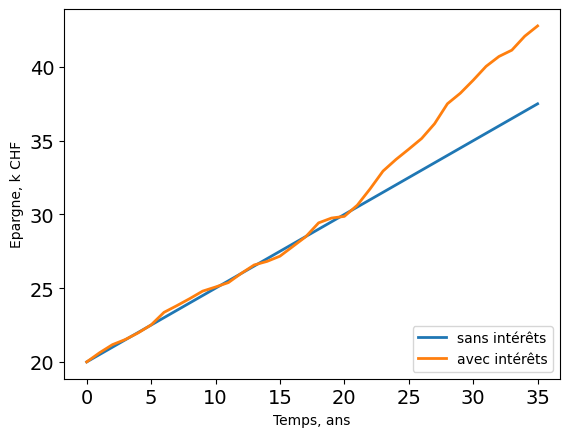

In [30]:
M_evol1 = np.zeros(temps_total+1)
M_evol2 = np.zeros(temps_total+1)

M_evol1[0] = M_init
M_evol2[0] = M_init

for it in range(1, temps_total+1):
    intrst = np.random.normal(0.005, 0.01)
    M_evol1[it] = M_evol1[it - 1] + M_save
    M_evol2[it] = (M_evol2[it - 1] + M_save) * (1 + intrst) 

plt.figure(1)
plt.clf()
plt.plot(M_evol1 / 1000, linewidth=2)
plt.plot(M_evol2 / 1000, linewidth=2)
plt.legend(['sans intérêts', 'avec intérêts'], loc='lower right')
plt.xlabel('Temps, ans')
plt.ylabel('Epargne, k CHF')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Est-il envisageable de résoudre ce probléme avec une approche analytique?

### ✅ **À vous de faire !** (Répondre à la question dans un bloc 'markdown')

_non, dans ce cas, il ne peut y avoir de méthode analytique pour résoudre le problème._

## 1.6
Reprenez le code précédent, et ajoutez une dépense de 1125.- à l'année 20 dans les deux cas, avec et sans intérêts de 0.6% (fixe), en utilisant une clause (par ex. `if it==19: ...` car l'année 1 correpondant à `it=0`). Affichez la différence de fortune (valeur absolue) entre les cas avec et sans intérêts fixe de 0.6% à l'année 35.

### ✅ **À vous de faire !**

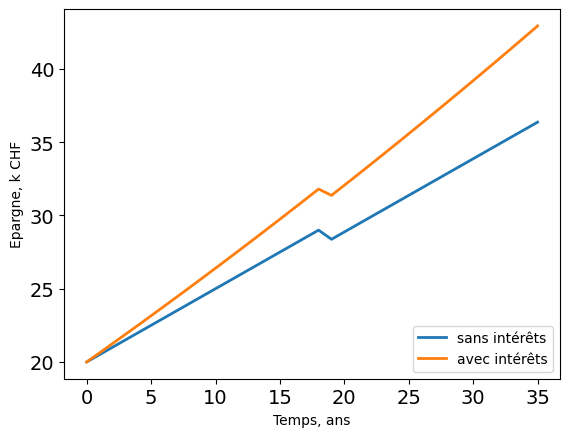

6570.218641712097


In [31]:
M_evol1 = np.zeros(temps_total+1)
M_evol2 = np.zeros(temps_total+1)
expns = 1125
intrst = 0.006

M_evol1[0] = M_init
M_evol2[0] = M_init

for it in range(1, temps_total+1):
    M_evol1[it] = M_evol1[it - 1] + M_save
    M_evol2[it] = (M_evol2[it - 1] + M_save) * (1 + intrst)
    if it == 19:
        M_evol1[it] -= expns
        M_evol2[it] -= expns

plt.figure(1)
plt.clf()
plt.plot(M_evol1 / 1000, linewidth=2)
plt.plot(M_evol2 / 1000, linewidth=2)
plt.legend(['sans intérêts', 'avec intérêts'], loc='lower right')
plt.xlabel('Temps, ans')
plt.ylabel('Epargne, k CHF')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

DiffAtEnd = M_evol2[-1] - M_evol1[-1]  

print(DiffAtEnd)


# Conclusion:

Il existe deux manières de résoudre le modèle ci-dessus :

**1. Analytiquement** : si l'on peut trouver une solution exacte (c'est-à-dire une formule), ce qui est rarement le cas en pratique.

**2. Numériquement** : si l'on peut implémenter un algorithme qui approche la solution à l'aide d'une méthode numérique itérative, ce qui est beaucoup plus général.

L'objectif principal du cours de modélisation numérique est d'apprendre à calculer des solutions **numériques** pour des problèmes inspirés de la physique.